In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [3]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

In [4]:
# create engine to hawaii.sqlite
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [5]:
# reflect an existing database into a new model
Base = automap_base()
# reflect the tables
Base.prepare(autoload_with=engine)

In [6]:
# View all of the classes that automap found
Base.classes.keys()

['measurement', 'station']

In [7]:
# Save references to each table
Measurement = Base.classes.measurement
Station = Base.classes.station

In [8]:
# Create our session (link) from Python to the DB
session = Session(engine)


# Exploratory Precipitation Analysis

In [16]:
# Find the most recent date in the data set.
most_recent = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
most_recent


('2017-08-23',)

2017-08-23
2016-08-23 00:00:00


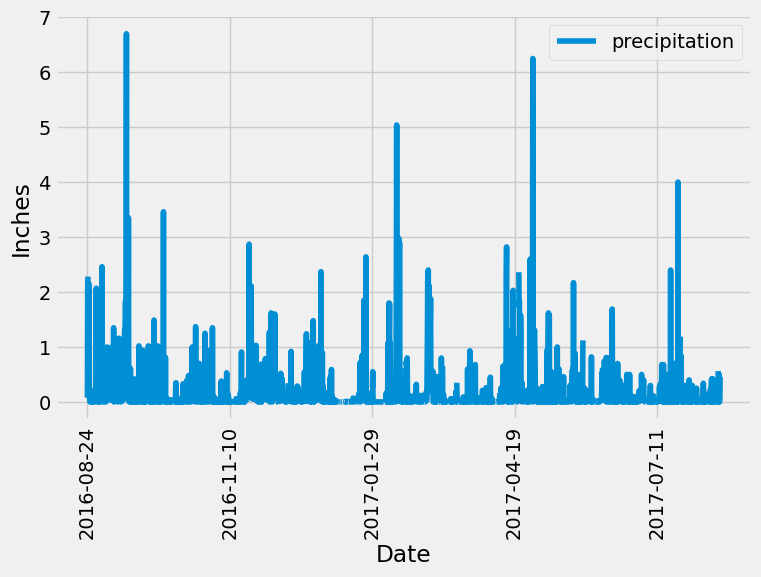

In [18]:
# Design a query to retrieve the last 12 months of precipitation data and plot the results. 
# Starting from the most recent data point in the database. 

most_recent1 = most_recent[0]
print(most_recent1)
most_recent_prev = dt.datetime.strptime(most_recent1, "%Y-%m-%d") - dt.timedelta(days=365)

print(most_recent_prev)

# Calculate the date one year from the last date in data set.
precip_data = session.query(Measurement.date, Measurement.prcp).\
    filter(Measurement.date >= most_recent_prev).\
    order_by(Measurement.date).all()

precip_df = pd.DataFrame(precip_data)
#precip_df.set_index('date', inplace=True)
precip_df
# Perform a query to retrieve the data and precipitation scores


# Save the query results as a Pandas DataFrame. Explicitly set the column names
# Sort the dataframe by date
# Use Pandas Plotting with Matplotlib to plot the data
precip_plot = precip_df.plot(x='date' , y ='prcp', rot=90, label="precipitation",figsize = (8,5))
precip_plot.set_xlabel("Date")
precip_plot.set_ylabel("Inches")
plt.legend(loc='upper right')
plt.show()

In [11]:
# Use Pandas to calculate the summary statistics for the precipitation data
precip_count = precip_df['prcp'].count()
precip_mean = precip_df['prcp'].mean()
precip_std = precip_df['prcp'].std()
precip_min = precip_df['prcp'].min()
precip_25 = precip_df['prcp'].quantile(0.25)
precip_50 = precip_df['prcp'].quantile(0.50)
precip_75 = precip_df['prcp'].quantile(0.75)
precip_max = precip_df['prcp'].max()

precip_stats = pd.DataFrame({
    "precipitation": [precip_count, 
                      precip_mean, 
                      precip_std, 
                      precip_min, 
                      precip_25, 
                      precip_50, 
                      precip_75, 
                      precip_max]},
    index=["count", "mean", "std", "min", "25%", "50%", "75%", "max"])

precip_stats

,precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


# Exploratory Station Analysis

In [12]:
# Design a query to calculate the total number of stations in the dataset

stations = session.query(Station.station).count()
stations

9

In [13]:
# Design a query to find the most active stations (i.e. which stations have the most rows?)
# List the stations and their counts in descending order.
station_counts = session.query((Measurement.station), func.count(Measurement.station)).\
                        group_by(Measurement.station).\
                        order_by(func.count(Measurement.station).desc()).all()
station_counts

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [14]:
# Using the most active station id from the previous query, calculate the lowest, highest, and average temperature.
start = '2016-08-23'
end = '2017-08-23'

min_avg_max_temps = session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), 
                                  func.max(Measurement.tobs)).\
filter(Measurement.date >= start).\
order_by(Measurement.date).all()

session.close()

# Return a JSON list of the minimum, average, and maximum temperature observations beginning with a specified date
temp_data = []
for temps in min_avg_max_temps:
    temp_data.append(temps)

print(temp_data)

[(58.0, 74.59058295964125, 87.0)]


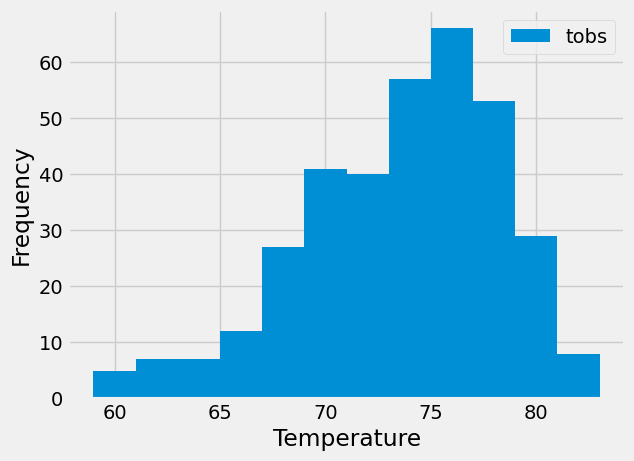

In [15]:
# Using the most active station id
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram
session.query(func.min(Measurement.tobs), func.max(Measurement.tobs),func.avg(Measurement.tobs)).\
    filter(Measurement.station == 'USC00519281').all()
temp_data_12_months = session.query(Measurement.tobs).\
    filter(Measurement.date <= '2017-08-23').\
    filter(Measurement.date >= '2016-08-23').\
    filter(Measurement.station == 'USC00519281').\
    order_by(Measurement.date).all()

temp_data_12mo_df = pd.DataFrame(temp_data_12_months, columns=['temp'])
temp_data_12mo_df

plt.hist(temp_data_12mo_df, bins=12,label='tobs')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.legend()
plt.show()

# Close Session

In [16]:
# Close Session
session.close()